<a href="https://colab.research.google.com/github/Lianasy/Deep-learning-labs/blob/main/DL_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **Data Preparation**

In [ ]:
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1


In [ ]:
# Define the dataset directory path
dataset_path = "/root/.cache/kagglehub/datasets/yasserh/wine-quality-dataset/versions/1"

# List all files in the dataset directory
print("Files in dataset directory:", os.listdir(dataset_path))


Files in dataset directory: ['WineQT.csv']


In [ ]:
# Define the correct dataset file path
csv_file = os.path.join(dataset_path, "WineQT.csv")

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows of the dataset
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Remove unnecessary columns
df = df.drop(columns=['Id'])  # Drop the "Id" column if it exists

# Convert "quality" column to categorical labels
df['quality'] = df['quality'].apply(lambda x: "good" if x > 5 else "bad")

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop duplicate rows if any exist
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# Separate features (X) and target variable (y)
X = df.drop(columns=['quality'])  # Features (all except "quality")
y = df['quality']  # Target column ("good" / "bad")

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back into a DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

# Encode the target column
y = y.map({"bad": 0, "good": 1})  # 0 = bad, 1 = good

# Print final dataset preview
print("Final prepared dataset:")
print(X.head())
print(y.head())

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Shape after removing duplicates: (1018, 12)
Final prepared dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.510499          0.909227    -1.370507       -0.475125  -0.230739   
1      -0.280676          1.892418    -1.370507        0.057517   0.223040   
2      -0.280676          1.236957    -1.166564       -0.170758   0.099282   
3       1.672822         -1.384886     1.484700       -0.475125  -0.251365   
4      -0.510499          0.690740    -1.370507       -0.551216  -0.251365   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.457043             -0.3722

# **Splitting the Dataset into Training, Testing, and Validation Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# **Initialization**

In [ ]:
np.random.seed(42)
input_size = X.shape[1]
hidden_size = 8
output_size = 1
learning_rate = 0.001
epochs = 10000

# # Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))


# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def softsign(x):
    return x / (1 + np.abs(x))

def softsign_derivative(x):
    return 1 / (1 + np.abs(x))**2

def custom_activation(x):
    return np.tanh(x) * np.sin(x)

def custom_activation_derivative(x):
    tanh_derivative = 1 - np.tanh(x)**2
    return tanh_derivative * np.sin(x) + np.tanh(x) * np.cos(x)


# **Neural Network Model Training and Evaluation with Various Activation Functions**

In [ ]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_derivative(y_true, y_pred):
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return (y_pred - y_true) / (y_pred * (1 - y_pred))

class NeuralNetworkModel:
    def __init__(self, W1, b1, W2, b2, activation_function):
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2
        self.b2 = b2
        self.activation_function = activation_function

    def predict(self, X):
        hidden_input = np.dot(X, self.W1) + self.b1
        hidden_output = self.activation_function(hidden_input)
        final_input = np.dot(hidden_output, self.W2) + self.b2
        y_pred_prob = 1 / (1 + np.exp(-final_input))
        return (y_pred_prob > 0.5).astype(int)



def train_neural_network(X_train, y_train, X_val, y_val, W1, b1, W2, b2, activation_function, activation_derivative, epochs=10000, learning_rate=0.01, min_delta=1e-4, patience=10):
    if isinstance(y_train, pd.Series):
        y_train_np = y_train.values.reshape(-1, 1)
    else:
        y_train_np = np.array(y_train).reshape(-1, 1)

    if isinstance(y_val, pd.Series):
        y_val_np = y_val.values.reshape(-1, 1)
    else:
        y_val_np = np.array(y_val).reshape(-1, 1)

    loss_history = []
    val_loss_history = []
    train_accuracy_history = []
    val_accuracy_history = []
    best_loss = float('inf')
    no_improvement_epochs = 0

    for epoch in range(epochs):
        hidden_input = np.dot(X_train, W1) + b1
        hidden_output = activation_function(hidden_input)
        final_input = np.dot(hidden_output, W2) + b2
        final_output = 1 / (1 + np.exp(-final_input))

        loss = binary_cross_entropy(y_train_np, final_output)
        loss_history.append(loss)

        y_train_pred = (final_output > 0.5).astype(int)
        train_accuracy = calculate_accuracy(y_train_np, y_train_pred)
        train_accuracy_history.append(train_accuracy)

        error = binary_cross_entropy_derivative(y_train_np, final_output)
        output_delta = error * (final_output * (1 - final_output))
        hidden_error = output_delta.dot(W2.T)
        hidden_delta = hidden_error * activation_derivative(hidden_output)

        W2 -= hidden_output.T.dot(output_delta) * learning_rate
        b2 -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        W1 -= X_train.T.dot(hidden_delta) * learning_rate
        b1 -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

        val_hidden_input = np.dot(X_val, W1) + b1
        val_hidden_output = activation_function(val_hidden_input)
        val_final_input = np.dot(val_hidden_output, W2) + b2
        val_final_output = 1 / (1 + np.exp(-val_final_input))

        val_loss = binary_cross_entropy(y_val_np, val_final_output)
        val_loss_history.append(val_loss)

        y_val_pred = (val_final_output > 0.5).astype(int)
        val_accuracy = calculate_accuracy(y_val_np, y_val_pred)
        val_accuracy_history.append(val_accuracy)

        if val_loss < best_loss - min_delta:
            best_loss = val_loss
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1

        if no_improvement_epochs >= patience:
            print(f"Early stopping at epoch {epoch}. Loss has not improved for {patience} epochs.")
            break

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Train Loss: {loss:.5f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.5f}, Validation Accuracy: {val_accuracy:.4f}")

    model = NeuralNetworkModel(W1, b1, W2, b2, activation_function)
    print(f"Epoch {epoch}, Train Loss: {loss:.5f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {val_loss:.5f}, Validation Accuracy: {val_accuracy:.4f}")
    return model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history


def plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history, title="Loss and Accuracy Curve"):
    plt.figure(figsize=(10, 6))

    # Plotting Loss (Training vs Validation)
    plt.subplot(2, 1, 1)  # Two rows, one column, first subplot
    plt.plot(loss_history, label="Train Loss")
    plt.plot(val_loss_history, label="Validation Loss")
    plt.title("Train and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    # Plotting Accuracy (Training vs Validation)
    plt.subplot(2, 1, 2)  # Two rows, one column, second subplot
    plt.plot(train_accuracy_history, label="Train Accuracy")
    plt.plot(val_accuracy_history, label="Validation Accuracy")
    plt.title("Train and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()



def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Select the first two features for plotting
    X_2D = X[:, :2]

    # Compute the mean for the remaining features
    if X.shape[1] > 2:
        mean_other_features = np.mean(X[:, 2:], axis=0)
    else:
        mean_other_features = None

    # Create a mesh grid
    x_min, x_max = X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1
    y_min, y_max = X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Prepare grid input for predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # If more than two features exist, add the averaged values to match the input size
    if mean_other_features is not None:
        avg_features = np.tile(mean_other_features, (grid_points.shape[0], 1))
        grid_points = np.hstack((grid_points, avg_features))

    # Make predictions using the provided model
    y_pred_grid = model.predict(grid_points).reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, y_pred_grid, alpha=0.6, cmap=plt.cm.Paired)
    plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()




## **ReLU**

Epoch 0, Train Loss: 0.71579, Train Accuracy: 0.5453, Validation Loss: 0.67498, Validation Accuracy: 0.6196
Epoch 100, Train Loss: 0.47087, Train Accuracy: 0.7896, Validation Loss: 0.51531, Validation Accuracy: 0.7485
Epoch 200, Train Loss: 0.44908, Train Accuracy: 0.8065, Validation Loss: 0.50792, Validation Accuracy: 0.7546
Early stopping at epoch 204. Loss has not improved for 10 epochs.
Epoch 204, Train Loss: 0.44863, Train Accuracy: 0.8065, Validation Loss: 0.50819, Validation Accuracy: 0.7546
Test Accuracy: 0.7304


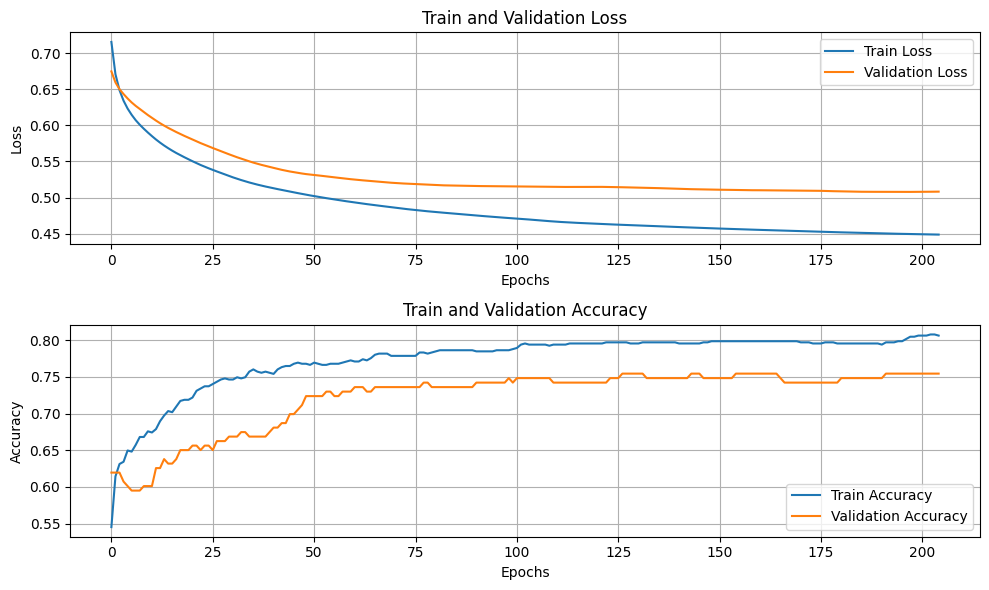

In [ ]:
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)

model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_neural_network(
    X_train, y_train, X_val, y_val,
    W1, b1, W2, b2,
    activation_function=relu, activation_derivative=relu_derivative,
    epochs=10000, learning_rate=0.001
)

y_pred = model.predict(X_test)
accuracy = calculate_accuracy(y_test.values.reshape(-1, 1), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history)


# plot_decision_boundary(X_train, y_train, model, title="Decision Boundary (Trained Model)")

## **Sigmoid**

Training model with sigmoid activation function
y_train shape: (651,)
y_val shape: (163,)
Epoch 0, Train Loss: 0.73321, Train Accuracy: 0.5422, Validation Loss: 0.69540, Validation Accuracy: 0.5337
Epoch 100, Train Loss: 0.50354, Train Accuracy: 0.7604, Validation Loss: 0.54329, Validation Accuracy: 0.7178
Early stopping at epoch 105. Loss has not improved for 10 epochs.
Epoch 105, Train Loss: 0.50252, Train Accuracy: 0.7573, Validation Loss: 0.54334, Validation Accuracy: 0.7178
Test Accuracy: 0.7353


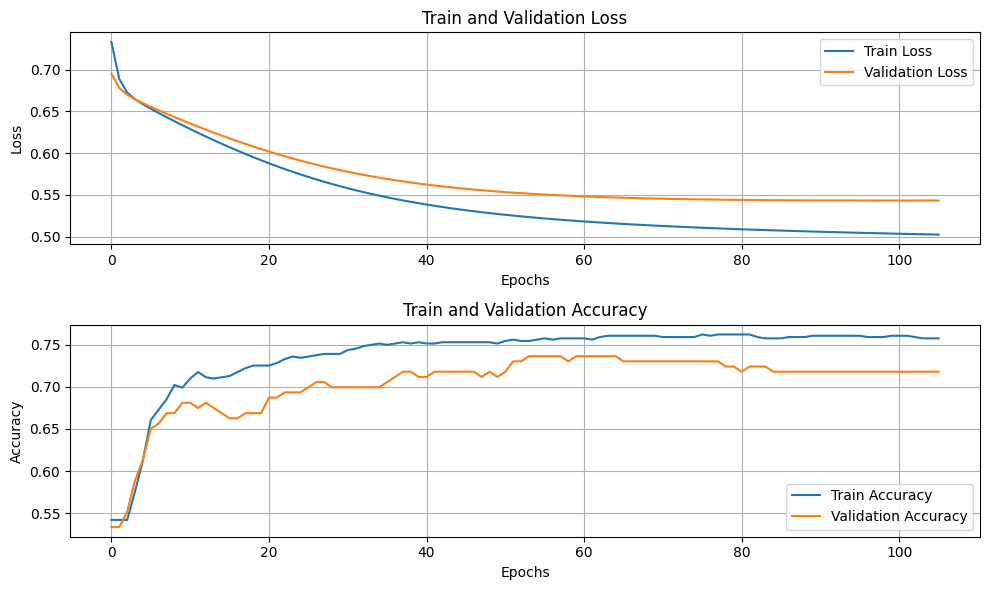

In [ ]:
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)

print("Training model with sigmoid activation function")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_neural_network(
    X_train, y_train, X_val, y_val,
    W1, b1, W2, b2,
    activation_function=sigmoid, activation_derivative=sigmoid_derivative,
    epochs=10000, learning_rate=0.001
)

y_pred = model.predict(X_test)
accuracy = calculate_accuracy(y_test.values.reshape(-1, 1), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history)

# plot_decision_boundary(X_train, y_train, model, title="Decision Boundary (Trained Model)")

## **Tanh**

Training model with tanh activation function
y_train shape: (651,)
y_val shape: (163,)
Epoch 0, Train Loss: 0.82834, Train Accuracy: 0.4808, Validation Loss: 0.68602, Validation Accuracy: 0.5399
Early stopping at epoch 43. Loss has not improved for 10 epochs.
Epoch 43, Train Loss: 0.49859, Train Accuracy: 0.7558, Validation Loss: 0.54758, Validation Accuracy: 0.7301
Test Accuracy: 0.7353


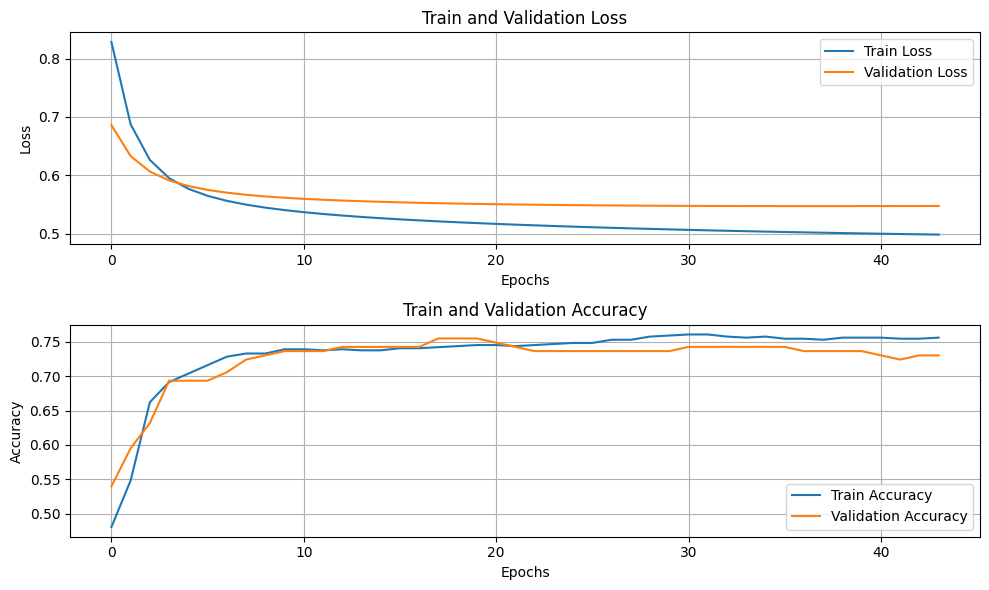

In [ ]:
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)

print("Training model with tanh activation function")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_neural_network(
    X_train, y_train, X_val, y_val,
    W1, b1, W2, b2,
    activation_function=tanh, activation_derivative=tanh_derivative,
    epochs=10000, learning_rate=0.001
)

y_pred = model.predict(X_test)
accuracy = calculate_accuracy(y_test.values.reshape(-1, 1), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history)

# plot_decision_boundary(X_train, y_train, model, title="Decision Boundary (Trained Model)")


## **Softsign**

Training model with softsign activation function
Epoch 0, Train Loss: 0.82966, Train Accuracy: 0.4639, Validation Loss: 0.72795, Validation Accuracy: 0.5521
Epoch 100, Train Loss: 0.49271, Train Accuracy: 0.7711, Validation Loss: 0.53737, Validation Accuracy: 0.7301
Epoch 200, Train Loss: 0.48443, Train Accuracy: 0.7711, Validation Loss: 0.53247, Validation Accuracy: 0.7117
Early stopping at epoch 285. Loss has not improved for 10 epochs.
Epoch 285, Train Loss: 0.47977, Train Accuracy: 0.7742, Validation Loss: 0.53025, Validation Accuracy: 0.7239
Test Accuracy: 0.7206


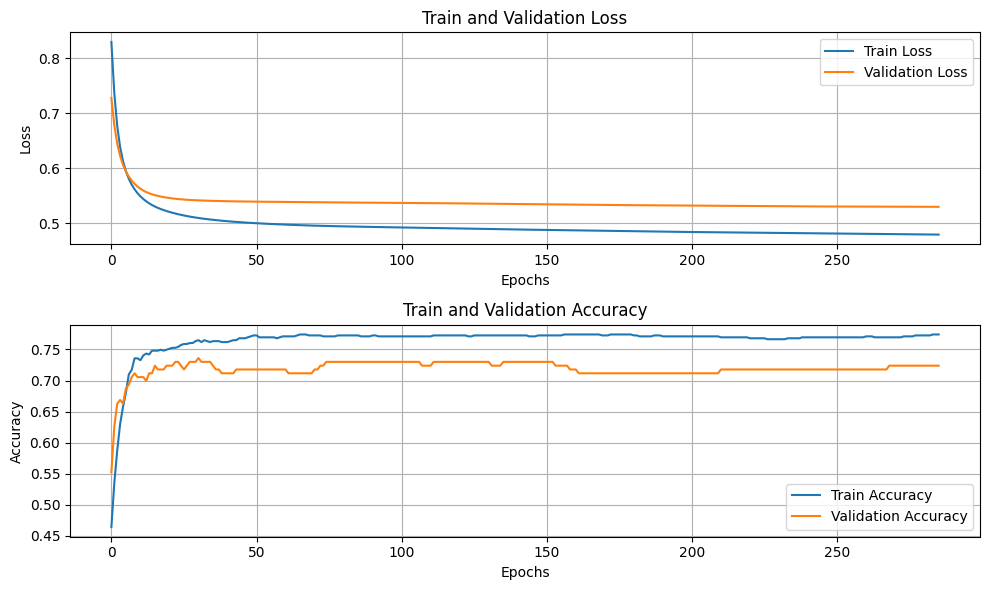

In [ ]:
# def softsign(x):
#     return x / (1 + np.abs(x))

# def softsign_derivative(x):
#     return 1 / (1 + np.abs(x)) ** 2

W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)

print("Training model with softsign activation function")

model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_neural_network(
    X_train, y_train, X_val, y_val,
    W1, b1, W2, b2,
    activation_function=softsign, activation_derivative=softsign_derivative,
    epochs=10000, learning_rate=0.001
)

y_pred = model.predict(X_test)
accuracy = calculate_accuracy(y_test.values.reshape(-1, 1), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history)

# plot_decision_boundary(X_train, y_train, model, title="Decision Boundary (Trained Model)")


## **Custom Activation**

Training model with custom activation function
Epoch 0, Train Loss: 0.67115, Train Accuracy: 0.5760, Validation Loss: 0.67977, Validation Accuracy: 0.5644
Early stopping at epoch 10. Loss has not improved for 10 epochs.
Epoch 10, Train Loss: 0.70930, Train Accuracy: 0.5115, Validation Loss: 0.71500, Validation Accuracy: 0.5031
Test Accuracy: 0.4951


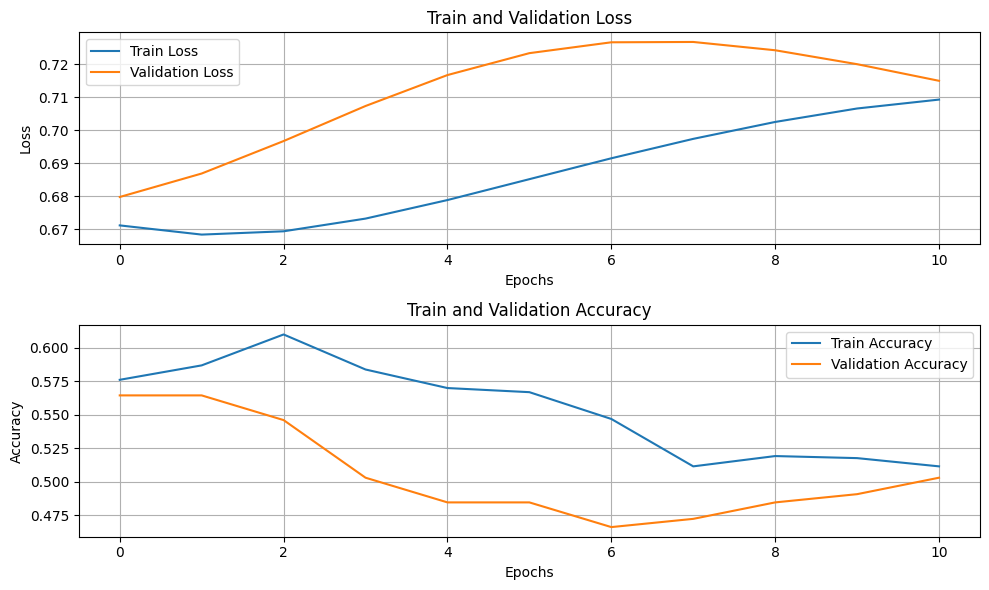

In [ ]:

W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)

print("Training model with custom activation function")

model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_neural_network(
    X_train, y_train, X_val, y_val,
    W1, b1, W2, b2,
    activation_function=custom_activation, activation_derivative=custom_activation_derivative,
    epochs=10000, learning_rate=0.001
)

y_pred = model.predict(X_test)
accuracy = calculate_accuracy(y_test.values.reshape(-1, 1), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history)

# plot_decision_boundary(X_train, y_train, model, title="Decision Boundary (Trained Model)")


# **Dataset 2**

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=42)

## **ReLU**

Epoch 0, Train Loss: 0.59618, Train Accuracy: 0.4734, Validation Loss: 0.46083, Validation Accuracy: 0.7750
Epoch 100, Train Loss: 0.19013, Train Accuracy: 0.9125, Validation Loss: 0.19471, Validation Accuracy: 0.9187
Epoch 200, Train Loss: 0.12065, Train Accuracy: 0.9547, Validation Loss: 0.12146, Validation Accuracy: 0.9500
Epoch 300, Train Loss: 0.06769, Train Accuracy: 0.9875, Validation Loss: 0.06792, Validation Accuracy: 0.9875
Epoch 400, Train Loss: 0.04385, Train Accuracy: 0.9922, Validation Loss: 0.04465, Validation Accuracy: 0.9938
Epoch 500, Train Loss: 0.03217, Train Accuracy: 0.9922, Validation Loss: 0.03317, Validation Accuracy: 0.9938
Epoch 600, Train Loss: 0.02569, Train Accuracy: 0.9922, Validation Loss: 0.02685, Validation Accuracy: 0.9938
Epoch 700, Train Loss: 0.02151, Train Accuracy: 0.9922, Validation Loss: 0.02296, Validation Accuracy: 0.9938
Epoch 800, Train Loss: 0.01866, Train Accuracy: 0.9969, Validation Loss: 0.02018, Validation Accuracy: 0.9938
Epoch 900, T

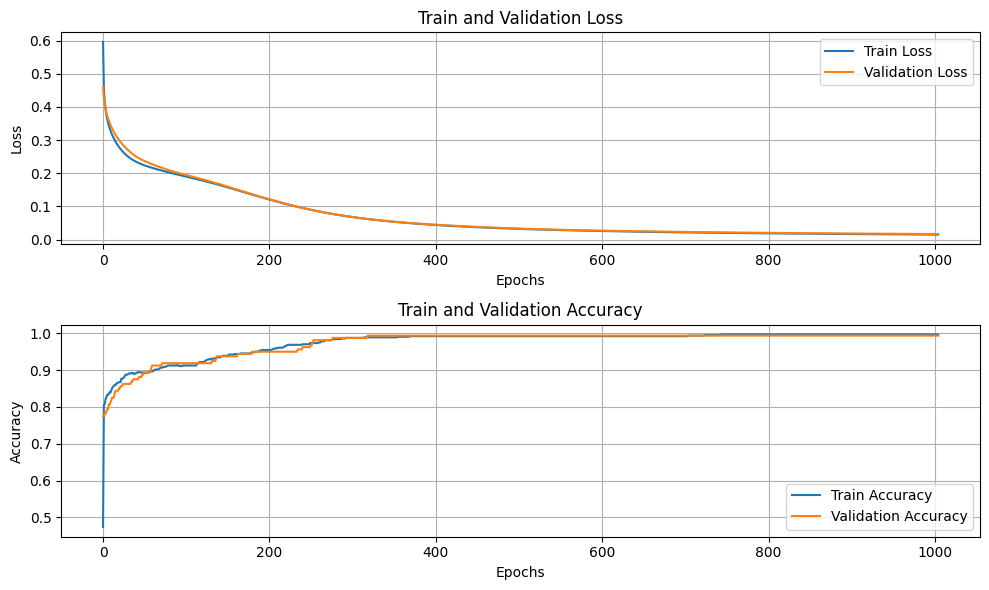

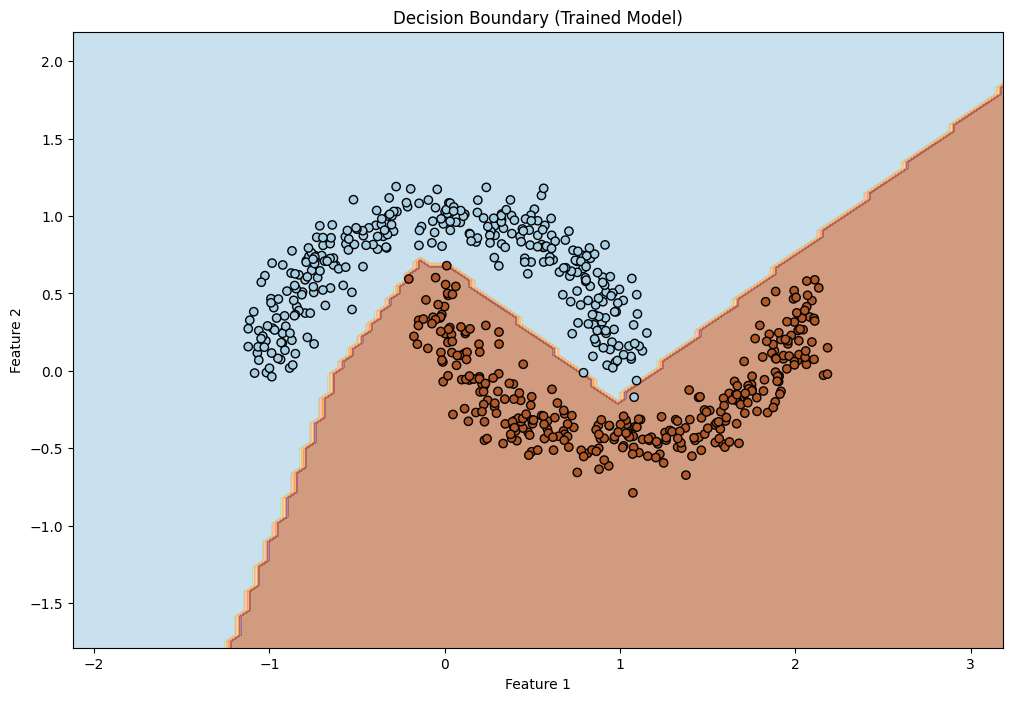

In [ ]:

# Initialize weights and biases
input_size = X_train2.shape[1]
hidden_size = 8
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))

model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_neural_network(
    X_train2, y_train2, X_val2, y_val2,
    W1, b1, W2, b2,
    activation_function=relu, activation_derivative=relu_derivative,
    epochs=10000, learning_rate=0.001
)

y_pred = model.predict(X_test2)
accuracy = calculate_accuracy(y_test2.reshape(-1, 1), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history)


plot_decision_boundary(
    X_train2, y_train2,
    model,
    title="Decision Boundary (Trained Model)"
)


## **Tanh**

Epoch 0, Train Loss: 0.95219, Train Accuracy: 0.5062, Validation Loss: 0.63594, Validation Accuracy: 0.4813
Epoch 100, Train Loss: 0.24262, Train Accuracy: 0.8922, Validation Loss: 0.27139, Validation Accuracy: 0.8688
Epoch 199, Train Loss: 0.21189, Train Accuracy: 0.9094, Validation Loss: 0.23881, Validation Accuracy: 0.8875
Test Accuracy: 0.9050


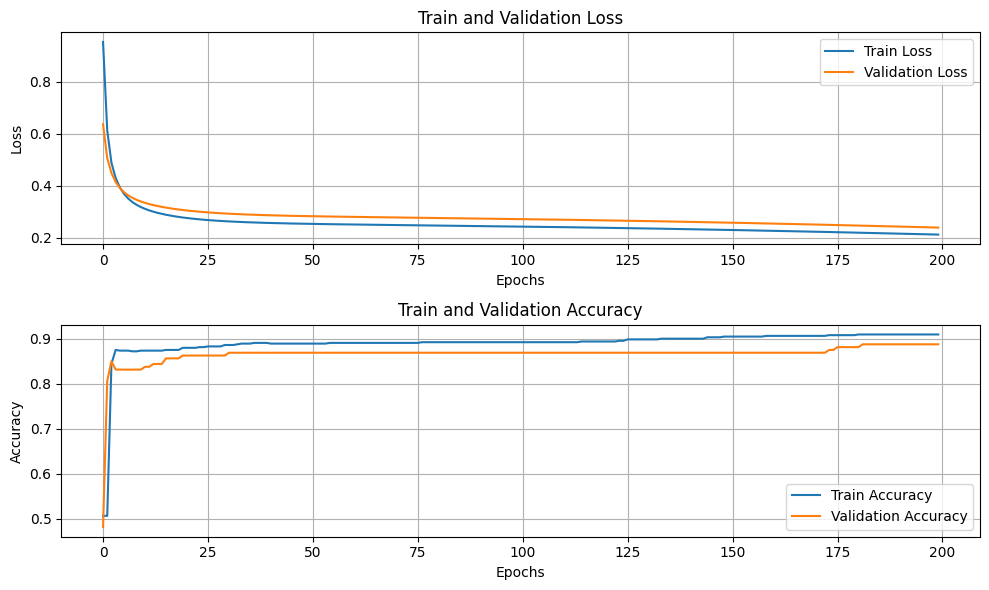

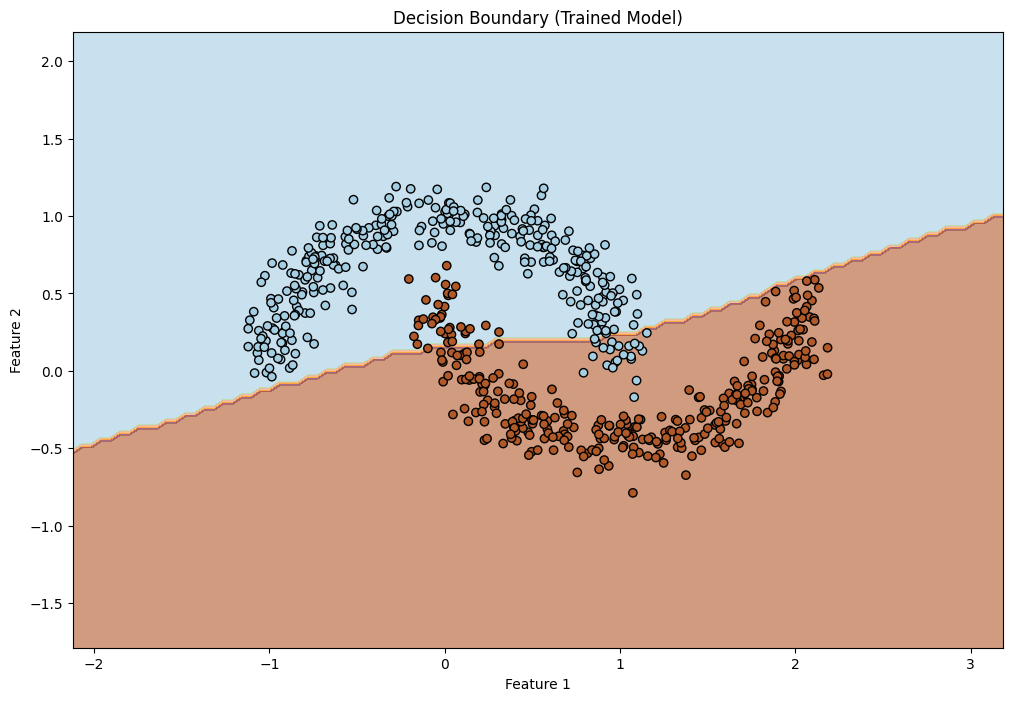

In [ ]:
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)

# Train the model and get a NeuralNetworkModel object
model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_neural_network(
    X_train2, y_train2, X_val2, y_val2,
    W1, b1, W2, b2,
    activation_function=tanh, activation_derivative=tanh_derivative,
    epochs=200, learning_rate=0.001
)

y_pred = model.predict(X_test2)
accuracy = calculate_accuracy(y_test2.reshape(-1, 1), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history)

# Plot decision boundary
plot_decision_boundary(
    X_train2, y_train2,
    model,
    title="Decision Boundary (Trained Model)"
)


## **Sigmoid**

Epoch 0, Train Loss: 0.78215, Train Accuracy: 0.5062, Validation Loss: 0.72422, Validation Accuracy: 0.4813
Epoch 100, Train Loss: 0.27636, Train Accuracy: 0.8781, Validation Loss: 0.29838, Validation Accuracy: 0.8562
Epoch 200, Train Loss: 0.25460, Train Accuracy: 0.8922, Validation Loss: 0.27929, Validation Accuracy: 0.8625
Epoch 300, Train Loss: 0.25065, Train Accuracy: 0.8891, Validation Loss: 0.27627, Validation Accuracy: 0.8688
Early stopping at epoch 334. Loss has not improved for 10 epochs.
Epoch 334, Train Loss: 0.25008, Train Accuracy: 0.8891, Validation Loss: 0.27590, Validation Accuracy: 0.8688
Test Accuracy: 0.8750


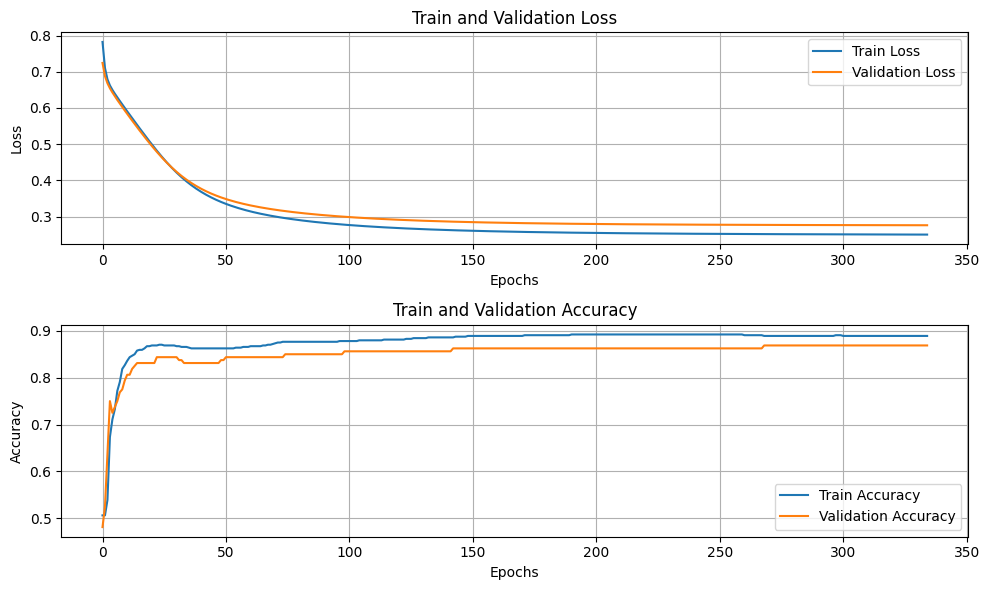

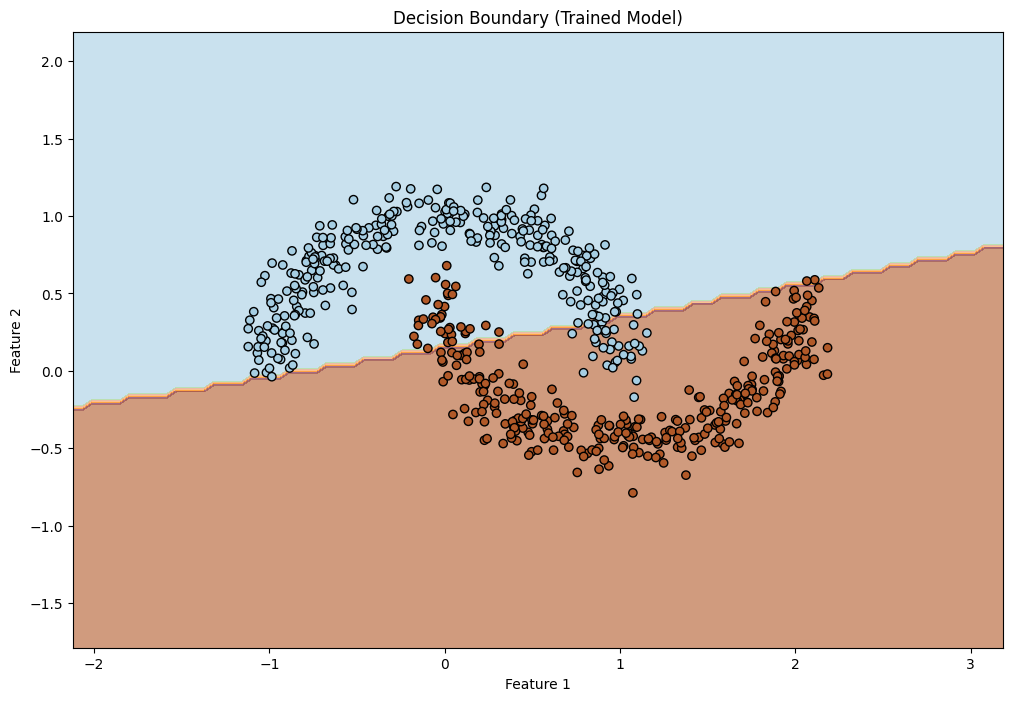

In [ ]:
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)

# Train the model and get a NeuralNetworkModel object
model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_neural_network(
    X_train2, y_train2, X_val2, y_val2,
    W1, b1, W2, b2,
    activation_function=sigmoid, activation_derivative=sigmoid_derivative,
    epochs=10000, learning_rate=0.001
)

y_pred = model.predict(X_test2)
accuracy = calculate_accuracy(y_test2.reshape(-1, 1), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history)

# Plot decision boundary
plot_decision_boundary(
    X_train2, y_train2,
    model,
    title="Decision Boundary (Trained Model)"
)


## **Softsign**

Epoch 0, Train Loss: 0.96494, Train Accuracy: 0.5062, Validation Loss: 0.81866, Validation Accuracy: 0.4813
Epoch 100, Train Loss: 0.25244, Train Accuracy: 0.8859, Validation Loss: 0.27966, Validation Accuracy: 0.8625
Epoch 200, Train Loss: 0.23634, Train Accuracy: 0.8953, Validation Loss: 0.26314, Validation Accuracy: 0.8688
Epoch 299, Train Loss: 0.22837, Train Accuracy: 0.8953, Validation Loss: 0.25484, Validation Accuracy: 0.8688
Test Accuracy: 0.8750


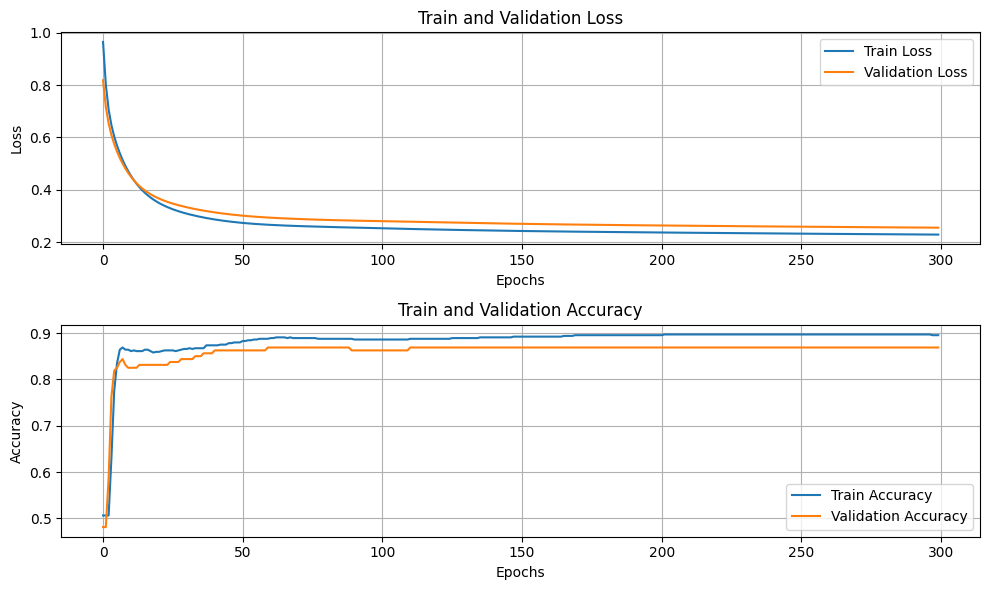

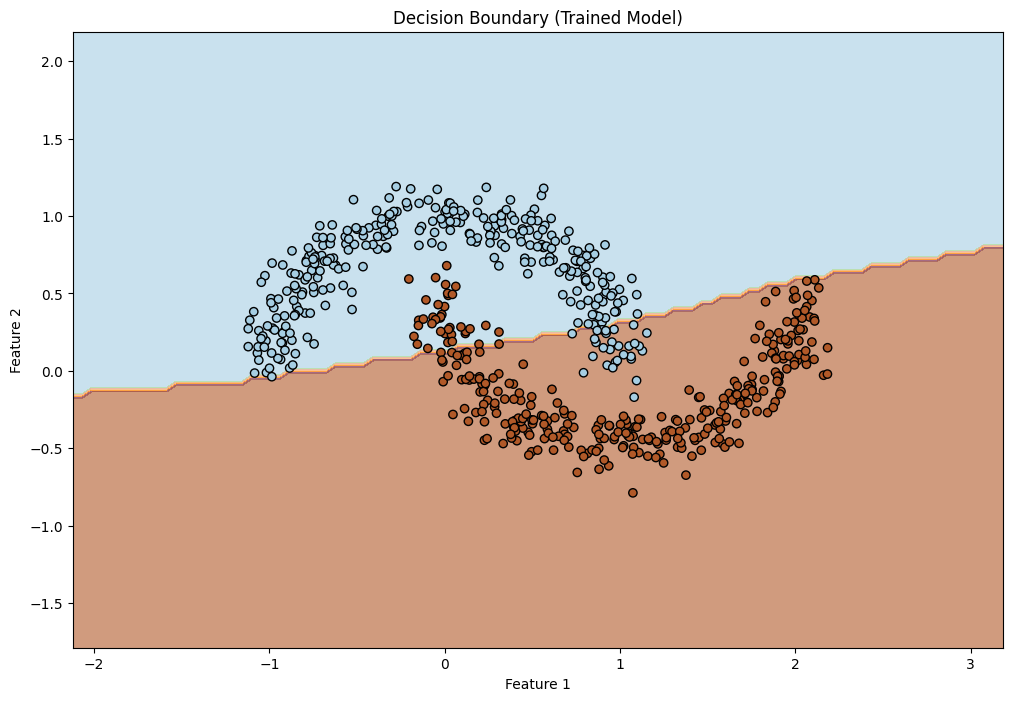

In [ ]:
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)

# Train the model and get a NeuralNetworkModel object

model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_neural_network(
    X_train2, y_train2, X_val2, y_val2,
    W1, b1, W2, b2,
    activation_function=softsign, activation_derivative=softsign_derivative,
    epochs=300, learning_rate=0.001
)

y_pred = model.predict(X_test2)
accuracy = calculate_accuracy(y_test2.reshape(-1, 1), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history)

# Plot decision boundary
plot_decision_boundary(
    X_train2, y_train2,
    model,
    title="Decision Boundary (Trained Model)"
)


## **Custom Activation**

Epoch 0, Train Loss: 0.65458, Train Accuracy: 0.5062, Validation Loss: 0.59146, Validation Accuracy: 0.7750
Early stopping at epoch 19. Loss has not improved for 10 epochs.
Epoch 19, Train Loss: 0.61722, Train Accuracy: 0.6641, Validation Loss: 0.68737, Validation Accuracy: 0.5813
Test Accuracy: 0.6250


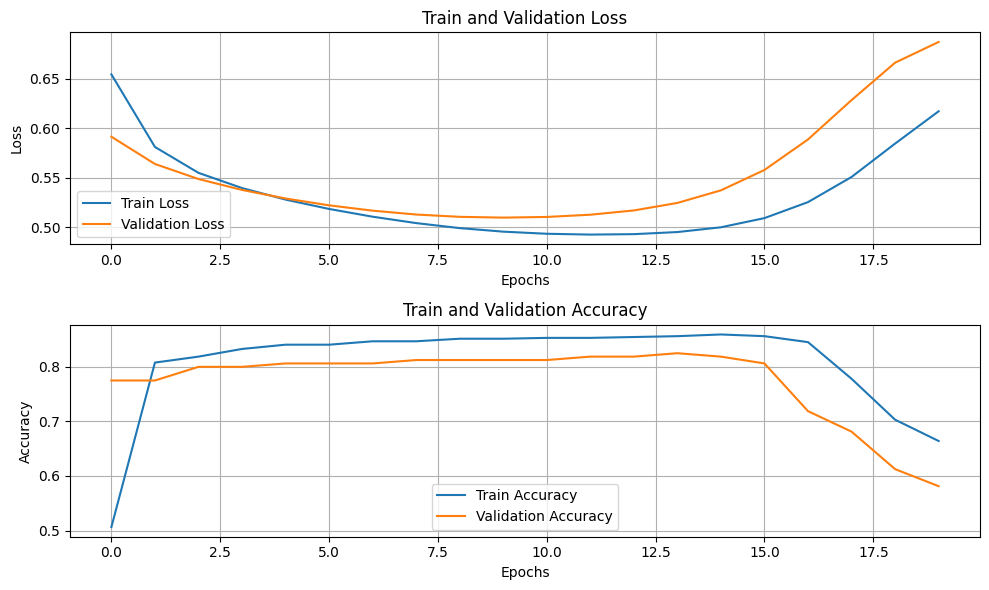

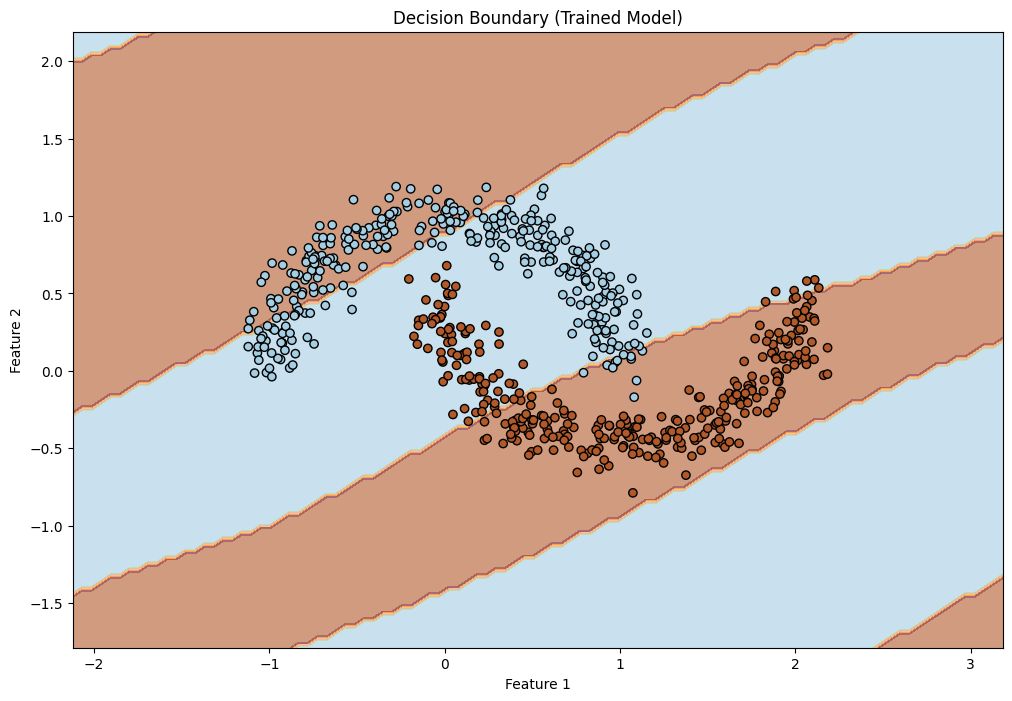

In [ ]:
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)

# Train the model and get a NeuralNetworkModel object

model, loss_history, val_loss_history, train_accuracy_history, val_accuracy_history = train_neural_network(
    X_train2, y_train2, X_val2, y_val2,
    W1, b1, W2, b2,
    activation_function=custom_activation, activation_derivative=custom_activation_derivative,
    epochs=300, learning_rate=0.001
)

y_pred = model.predict(X_test2)
accuracy = calculate_accuracy(y_test2.reshape(-1, 1), y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
plot_loss_curve(loss_history, val_loss_history, train_accuracy_history, val_accuracy_history)

# Plot decision boundary
plot_decision_boundary(
    X_train2, y_train2,
    model,
    title="Decision Boundary (Trained Model)"
)
